In [1]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

--2022-09-29 11:22:29--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: 'AER_credit_card_data.csv'

     0K .......... .......... .......... .......... .......... 69% 2.48M 0s
    50K .......... .......... .                               100% 12.4M=0.02s

2022-09-29 11:22:29 (3.27 MB/s) - 'AER_credit_card_data.csv' saved [73250/73250]



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('AER_credit_card_data.csv')
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


## Preparation

- Create the target variable by mapping yes to 1 and no to 0.
- Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1.

https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe

https://www.geeksforgeeks.org/replace-the-column-contains-the-values-yes-and-no-with-true-and-false-in-python-pandas/

In [3]:
#Create the target variable by mapping yes to 1 and no to 0.
df_hw4 = df.replace({'yes': 1, 'no': 0}).copy()
df_hw4.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [4]:
df.card.value_counts()

yes    1023
no      296
Name: card, dtype: int64

In [5]:
df_hw4.card.value_counts()

1    1023
0     296
Name: card, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution.
#Use train_test_split funciton for that with random_state=1.
df_train_full, df_test = train_test_split(df_hw4, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [8]:
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

del df_train['card']
del df_val['card']
del df_test['card']

In [9]:
y_train

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Question 1 ROC AUC

ROC AUC could also be used to evaluate feature importance of numerical variables.<br>
<br>
Let's do that<br>
<br>
- For each numerical variable, use it as score and compute AUC with the card variable.
- Use the training dataset for that.
If your AUC is < 0.5, invert this variable by putting "-" in front<br>
<br>
(e.g. -df_train['expenditure'])<br>
<br>
AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.<br>
<br>
Which numerical variable (among the following 4) has the highest AUC?<br>
<br>
- reports
- dependents
- active
- share

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   reports      791 non-null    int64  
 1   age          791 non-null    float64
 2   income       791 non-null    float64
 3   share        791 non-null    float64
 4   expenditure  791 non-null    float64
 5   owner        791 non-null    int64  
 6   selfemp      791 non-null    int64  
 7   dependents   791 non-null    int64  
 8   months       791 non-null    int64  
 9   majorcards   791 non-null    int64  
 10  active       791 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 68.1 KB


In [11]:
from sklearn.metrics import roc_auc_score

https://stackoverflow.com/questions/15785719/how-to-print-a-dictionary-line-by-line-in-python

In [20]:
import pprint
auc_values = {}

for col in df_train.columns:
    if roc_auc_score(y_train, df_train[col])<0.5:
        auc_values[col] = roc_auc_score(y_train, -df_train[col])
    else:
        auc_values[col] = roc_auc_score(y_train, df_train[col])

pprint.pprint(sorted(auc_values.items(), key=lambda x: x[1], reverse=True), width=1)

[('expenditure',
  0.991042345276873),
 ('share',
  0.989183643423692),
 ('reports',
  0.7166629860689376),
 ('active',
  0.6043173411362006),
 ('income',
  0.5908049467233478),
 ('owner',
  0.5856751136384548),
 ('majorcards',
  0.5343859842838476),
 ('dependents',
  0.5327757227773791),
 ('months',
  0.5294217780967629),
 ('age',
  0.5240020979407055),
 ('selfemp',
  0.5097995914536521)]


<div class="alert alert-block alert-success">
<b>Answer for Question 1 among given 4 is</b> 'share': 0.989183643423692
</div>

### Training the model

From now on, use these columns only:<br>
<br>
["reports", "age", "income", "share", "expenditure", "owner", "selfemp", "dependents", "months", "majorcards", "active"]<br>
<br>
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:<br>
<br>
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [21]:
#Apply one-hot-encoding using DictVectorizer
from sklearn.feature_extraction import DictVectorizer

In [22]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [23]:
def one_hot_enc(df):
    train_dict = df.to_dict(orient='records')
    X = dv.transform(train_dict)
    
    return X

In [24]:
X_val = one_hot_enc(df_val)
X_test = one_hot_enc(df_test)


In [25]:
#train the logistic regression with these parameters:

#LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [26]:
from sklearn.linear_model import LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [27]:
model_lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

# Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)
<br><br>
- 0.615
- 0.515
- 0.715
- 0.995

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [28]:
y_pred_lr = model_lr.predict_proba(X_val)[:, 1]
print('The AUC of this model on the validation dataset is %.3f' % (roc_auc_score(y_val, y_pred_lr)))

The AUC of this model on the validation dataset is 0.995


<div class="alert alert-block alert-success">
<b>Answer for Question 2 is</b> The AUC of this model on the validation dataset is 0.995
</div>

# Question 3

Now let's compute precision and recall for our model.

- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them
<br>At which threshold precision and recall curves intersect?<br>
<br>
- 0.1
- 0.3
- 0.6
- 0.8

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

In [29]:
from sklearn.metrics import precision_recall_fscore_support


In [30]:
#precision_recall_fscore_support(y_val, y_pred_lr, average='binary')


In [31]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: #B
    tp = ((y_pred_lr >= t) & (y_val == 1)).sum()
    fp = ((y_pred_lr >= t) & (y_val == 0)).sum()
    fn = ((y_pred_lr < t) & (y_val == 1)).sum()
    tn = ((y_pred_lr < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [32]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,211,53,0,0
10,0.1,210,17,1,36
20,0.2,206,6,5,47
30,0.3,205,3,6,50
40,0.4,204,1,7,52
50,0.5,204,1,7,52
60,0.6,204,1,7,52
70,0.7,204,1,7,52
80,0.8,204,1,7,52
90,0.9,204,0,7,53


In [33]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [34]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,211,53,0,0,1.000000,1.000000
10,0.1,210,17,1,36,0.995261,0.320755
20,0.2,206,6,5,47,0.976303,0.113208
30,0.3,205,3,6,50,0.971564,0.056604
40,0.4,204,1,7,52,0.966825,0.018868
50,0.5,204,1,7,52,0.966825,0.018868
60,0.6,204,1,7,52,0.966825,0.018868
70,0.7,204,1,7,52,0.966825,0.018868
80,0.8,204,1,7,52,0.966825,0.018868
90,0.9,204,0,7,53,0.966825,0.000000


https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
https://medium.com/@shrutisaxena0617/precision-vs-recall-386cf9f89488

In [35]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)

df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall
0,0.0,211,53,0,0,1.000000,1.000000,0.799242,1.000000
10,0.1,210,17,1,36,0.995261,0.320755,0.925110,0.995261
20,0.2,206,6,5,47,0.976303,0.113208,0.971698,0.976303
30,0.3,205,3,6,50,0.971564,0.056604,0.985577,0.971564
40,0.4,204,1,7,52,0.966825,0.018868,0.995122,0.966825
50,0.5,204,1,7,52,0.966825,0.018868,0.995122,0.966825
60,0.6,204,1,7,52,0.966825,0.018868,0.995122,0.966825
70,0.7,204,1,7,52,0.966825,0.018868,0.995122,0.966825
80,0.8,204,1,7,52,0.966825,0.018868,0.995122,0.966825
90,0.9,204,0,7,53,0.966825,0.000000,1.000000,0.966825


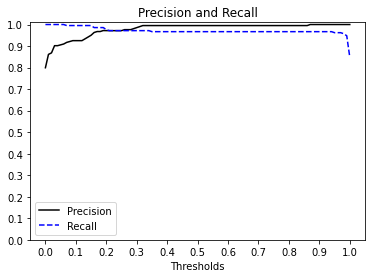

In [36]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.precision, color='black', linestyle='solid', label='Precision')
plt.plot(df_scores.threshold, df_scores.recall, color='blue', linestyle='dashed', label='Recall')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('Precision and Recall')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

<div class="alert alert-block alert-success">
<b>Answer for Question 3 is</b> From the given variants the closest point is 0.3
</div>

# Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both
<br>
This is the formula for computing F1:<br>
<br>
F1 = 2 * P * R / (P + R)<br>
<br>
Where P is precision and R is recall.<br>
<br>
Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01<br>
<br>
At which threshold F1 is maximal?<br>
<br>
- 0.1
- 0.4
- 0.6
- 0.7

In [37]:
df_scores['f1'] = 2 * df_scores.precision * df_scores.recall/ (df_scores.precision + df_scores.recall)
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall,f1
0,0.0,211,53,0,0,1.000000,1.000000,0.799242,1.000000,0.888421
10,0.1,210,17,1,36,0.995261,0.320755,0.925110,0.995261,0.958904
20,0.2,206,6,5,47,0.976303,0.113208,0.971698,0.976303,0.973995
30,0.3,205,3,6,50,0.971564,0.056604,0.985577,0.971564,0.978520
40,0.4,204,1,7,52,0.966825,0.018868,0.995122,0.966825,0.980769
50,0.5,204,1,7,52,0.966825,0.018868,0.995122,0.966825,0.980769
60,0.6,204,1,7,52,0.966825,0.018868,0.995122,0.966825,0.980769
70,0.7,204,1,7,52,0.966825,0.018868,0.995122,0.966825,0.980769
80,0.8,204,1,7,52,0.966825,0.018868,0.995122,0.966825,0.980769
90,0.9,204,0,7,53,0.966825,0.000000,1.000000,0.966825,0.983133


<div class="alert alert-block alert-success">
<b>Answer for Question 4 is</b> From the given variants the closest point with min value is 0.4
</div>

# Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:
<br><br>
KFold(n_splits=5, shuffle=True, random_state=1)<br>
<br>
- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation
How large is standard devidation of the AUC scores across different folds?
<br><br>
- 0.003
- 0.014
- 0.09
- 0.24

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [47]:
from sklearn.model_selection import KFold

In [61]:
def train(df, y, C=1.0):
    cat = df.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df.to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [62]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [63]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train_kf = df_train_full.iloc[train_idx]
    y_train_kf = df_train_kf.card.values
    del df_train_kf['card']

    df_val_kf = df_train_full.iloc[val_idx]
    y_val_kf = df_val_kf.card.values
    del df_val_kf['card']

    dv, model = train(df_train_kf, y_train_kf)
    y_pred_kf = predict(df_val_kf, dv, model)

    rocauc = roc_auc_score(y_val_kf, y_pred_kf)
    aucs.append(rocauc)

In [64]:
np.array(aucs).round(3)

array([0.994, 0.993, 0.995, 1.   , 1.   ])

In [65]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.996 ± 0.003


<div class="alert alert-block alert-success">
<b>Answer for Question 5 is</b> The standard devidation of the AUC scores across different folds is 0.003
</div>

# Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: [0.01, 0.1, 1, 10]
- Initialize KFold with the same parameters as previously
- Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
<br>
Which C leads to the best mean score?<br>
<br>
- 0.01
- 0.1
- 1
- 10
<br><br>
If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [67]:
for C in [0.01, 0.1, 1, 10, 100]:
    aucs = []
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train_kf = df_train_full.iloc[train_idx]
        y_train_kf = df_train_kf.card.values
        del df_train_kf['card']

        df_val_kf = df_train_full.iloc[val_idx]
        y_val_kf = df_val_kf.card.values
        del df_val_kf['card']

        dv, model = train(df_train_kf, y_train_kf, C)
        y_pred_kf = predict(df_val_kf, dv, model)

        rocauc = roc_auc_score(y_val_kf, y_pred_kf)
        aucs.append(rocauc)
    print(f"for C = {C:2.2f} auc = {np.mean(aucs):.3f} ± {np.std(aucs):.3f}")

for C = 0.01 auc = 0.992 ± 0.006
for C = 0.10 auc = 0.994 ± 0.005
for C = 1.00 auc = 0.996 ± 0.003
for C = 10.00 auc = 0.997 ± 0.003
for C = 100.00 auc = 0.997 ± 0.003


<div class="alert alert-block alert-success">
<b>Answer for Question 6 is</b> The best mean score is 0.997 which corresponds to the inverse of regularization strength C = 10 
</div>